In [1]:
# Import main libraries
import os
import numpy as np
import pandas as pd
import csv
from pandas.plotting import scatter_matrix
import sklearn
import matplotlib.pyplot as plt

# For Feature understanding
import featexp                            # pip install featexp
from featexp import get_univariate_plots
from featexp import get_trend_stats

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

import math
import os  
import xgboost as xgb # pip install xgboost

In [2]:
# Functions to be used 
def load_data(file_name):
    csv_path = os.path.join(file_name)
    return pd.read_csv(csv_path)


def univariate_plots(data, target, feature_list,bins):
    get_univariate_plots(data=data, target_col=target,features_list=feature_list,bins=10)

In [3]:
# Load data
df_train_1 = load_data('train.csv')
df_train_2 = load_data('building_structure.csv')
df_train_3 = load_data('building_ownership.csv')
df_train_4 = load_data('ward_demographic_data.csv')

In [4]:
df_1_2 = pd.merge(df_train_1, df_train_2, on=['building_id'])


df_1_2_3  = pd.merge(df_1_2, df_train_3, on=['building_id','district_id','vdcmun_id','ward_id'])



In [5]:
data = df_1_2_3

In [6]:
data.columns

Index(['building_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'damage_grade', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_su

In [7]:
data.head()

,building_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,damage_grade,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,44314,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
1,267748,0,0,0,0,0,0,0,0,5,...,1,0,0,0,0,0,0,0,0,0
2,84477,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,17679,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4,715499,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515937 entries, 0 to 515936
Data columns (total 48 columns):
building_id                               515937 non-null int64
has_geotechnical_risk                     515937 non-null int64
has_geotechnical_risk_fault_crack         515937 non-null int64
has_geotechnical_risk_flood               515937 non-null int64
has_geotechnical_risk_land_settlement     515937 non-null int64
has_geotechnical_risk_landslide           515937 non-null int64
has_geotechnical_risk_liquefaction        515937 non-null int64
has_geotechnical_risk_other               515937 non-null int64
has_geotechnical_risk_rock_fall           515937 non-null int64
damage_grade                              515937 non-null int64
district_id                               515937 non-null int64
vdcmun_id                                 515937 non-null int64
ward_id                                   515937 non-null int64
count_floors_pre_eq                       515937 non-null

In [9]:
data.describe()

,building_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,damage_grade,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,...,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000,515937.000000
mean,368273.689978,0.123709,0.042424,0.009391,0.034361,0.069340,0.002351,0.000994,0.035086,3.578169,...,0.063797,0.033863,0.008102,0.001004,0.000382,0.001072,0.000205,0.000151,0.000091,0.005030
std,212785.556675,0.329249,0.201554,0.096450,0.182154,0.254031,0.048431,0.031517,0.183997,1.327290,...,0.244390,0.180876,0.089645,0.031670,0.019537,0.032721,0.014332,0.012295,0.009544,0.070742
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,552453.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,737054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data = pd.get_dummies(data, prefix='', prefix_sep='')
data.tail()

,building_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,damage_grade,...,Multi-projected,Others,Rectangular,Square,T-shape,U-shape,Institutional,Other,Private,Public
515932,190306,0,0,0,0,0,0,0,0,5,...,0,0,1,0,0,0,0,0,1,0
515933,602473,0,0,0,0,0,0,0,0,3,...,0,0,1,0,0,0,0,0,1,0
515934,96616,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
515935,392323,0,0,0,0,0,0,0,0,3,...,0,0,1,0,0,0,0,0,1,0
515936,392875,0,0,0,0,0,0,0,0,5,...,0,0,1,0,0,0,0,0,1,0


In [11]:
# Move columns damage_grade to last position
data = data[[c for c in data if c not in ['damage_grade']] 
       + ['damage_grade']]


In [12]:
# Find duplicate column names
duplicate_columns = data.columns[data.columns.duplicated()]
duplicate_columns

Index(['Other', 'Other', 'RC', 'RCC/RB/RBC', 'Other', 'Other', 'Other', 'RC',
       'RC', 'RCC/RB/RBC', 'RCC/RB/RBC', 'Other', 'Other', 'Other'],
      dtype='object')

In [13]:
data = data.drop(['Other', 'RC', 'RCC/RB/RBC', 'Other'], axis=1)

### Separate the target variable and rest of the variables using .iloc to subset the data.

In [14]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [15]:
#data.iloc[:,60:75].head()

### Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [16]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Users\Praxis\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Praxis\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Create the train and test set for cross-validation of the results using the train_test_split function from sklearn's model_selection module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a random_state is also assigned.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Model Parameters
learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
    
max_depth: determines how deeply each tree is allowed to grow during any boosting round.
    
subsample: percentage of samples used per tree. Low value can lead to underfitting.
    
colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
    
n_estimators: number of trees you want to build.
    
objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

In [18]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 10)

In [19]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[13:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.513757


In [21]:
## GPU support
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## k-Fold
In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the cv() method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters (check out this link) like:

num_boost_round: denotes the number of trees you build (analogous to n_estimators)

metrics: tells the evaluation metrics to be watched during CV

as_pandas: to return the results in a pandas DataFrame.

early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.

seed: for reproducibility of results.

Create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary because you will use num_boost_rounds instead.

You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame. Note that here you are using the Dmatrix object you created before.


max_depth [default=6] Typical values: 3-10

colsample_bytree: number of columns used by each tree. In order to avoid some columns to take too much credit for the prediction (think of it like in recommender systems when you recommend the most purchased products and forget about the long tail), take out a good proportion of columns. Values from 0.3 to 0.8 if you have many columns (especially if you did one-hot encoding), or 0.8 to 1 if you only have a few columns.


In [2]:
params = {
    "objective":"reg:linear",
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5, 
    'alpha': 10
        }

## GPU support, which I was not able to figure out yet. Results in dead kernel
# params = {"objective":"reg:linear",
#           'colsample_bytree': 0.3,
#           'learning_rate': 0.1,
#           'max_depth': 5, 
#           'alpha': 10, 
#           'tree_method':"gpu_hist", 
#           'gpu_id':0
#          }

# DOCS: https://xgboost.readthedocs.io/en/latest/gpu/
          
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=2,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

NameError: name 'xgb' is not defined

In [22]:
# D0: max_depth=5 and num_boost_round=50 was default, colsample_bytree': 0.3

# T1: max_depth=7  and num_boost_round=70, colsample_bytree': 0.3, learning_rate': 0.1  took a little bit longer on Server
# T2: max_depth=10 and num_boost_round=100, colsample_bytree': 0.3, learning_rate': 0.1 took a lot longer on Server
# T3: max_depth=8 and num_boost_round=110, colsample_bytree': 0.5, learning_rate': 0.05 took a lot longer on Server
# T4: max_depth=10 and num_boost_round=110, colsample_bytree': 0.3, learning_rate': 0.05 took a lot longer on Server
# T5: max_depth=10 and num_boost_round=130, colsample_bytree': 0.3, learning_rate': 0.1 took >15 min Server


cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.049293,0.000106,3.049546,0.000119
1,2.784050,0.005872,2.784469,0.005995
2,2.547473,0.004991,2.548107,0.005191
3,2.333143,0.005183,2.334062,0.005432
4,2.148755,0.009400,2.149889,0.009767


In [25]:
# show the last and best result, known as final boosting round metric.
print((cv_results["test-rmse-mean"]).tail(10))

# 69    0.947013 # T1
# 99    0.9026353 # T2
# 109   0.937290  # T3
# 109   0.916693  # T4
# 129   0.896319  # T5


120    0.897876
121    0.897705
122    0.897542
123    0.897437
124    0.897198
125    0.896975
126    0.896855
127    0.896675
128    0.896425
129    0.896319
Name: test-rmse-mean, dtype: float64


In [87]:
#xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [88]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[12:18:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [89]:
import matplotlib.pyplot as plt

#xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
#plt.show()

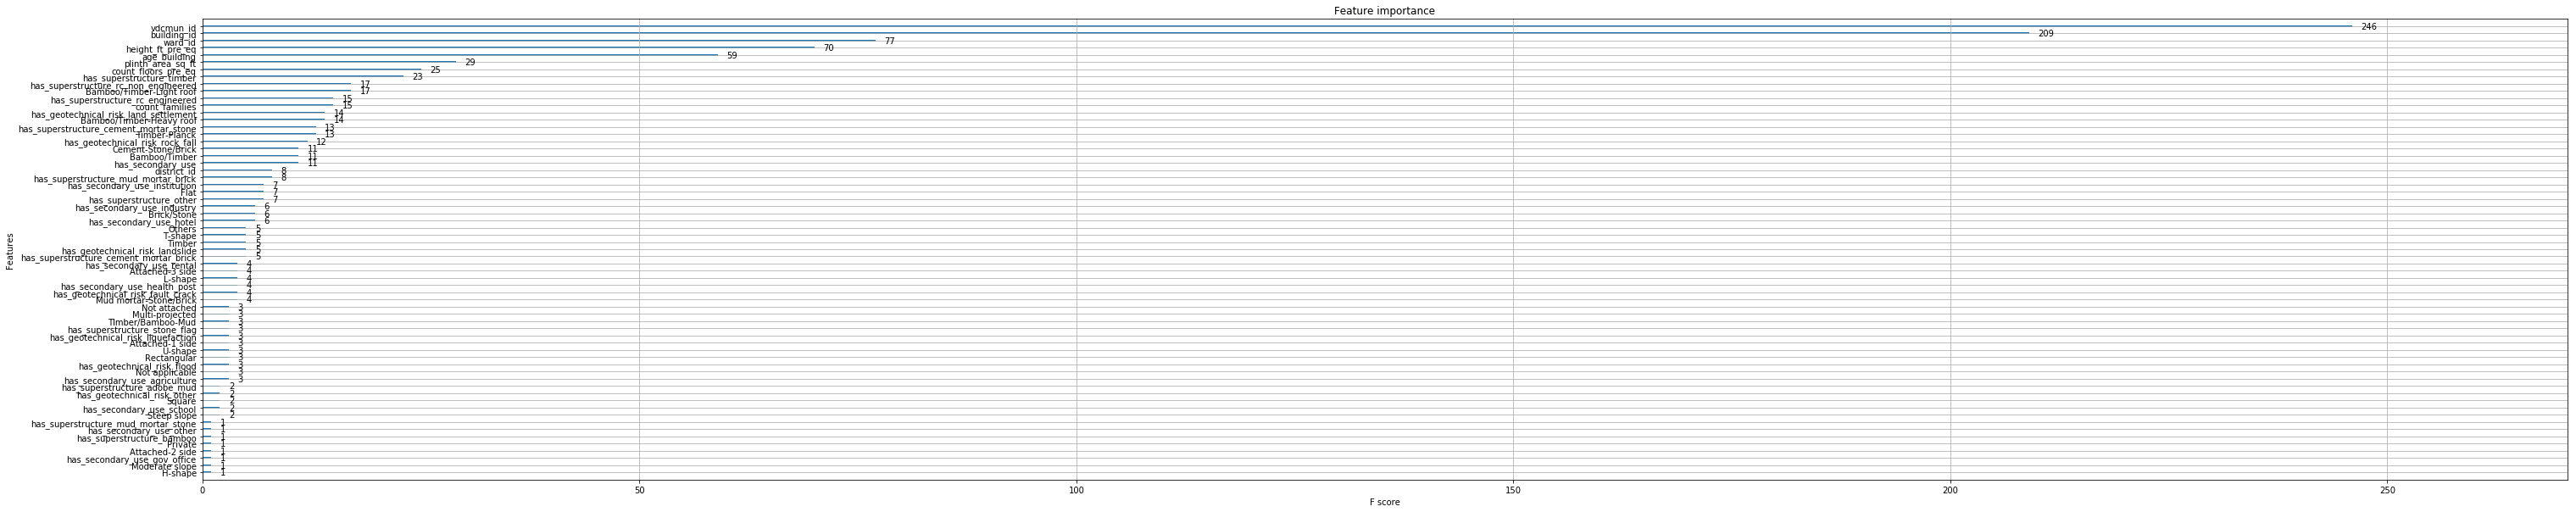

In [90]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [25, 35]
plt.show()

In [91]:
# Make prediction on test.csv

In [92]:
df_test = load_data('test.csv')

In [93]:
df_test_structure = pd.merge(df_test, df_train_2, on=['building_id'])

In [94]:
df_test_structure_own = pd.merge(df_test_structure, df_train_3, on=['building_id','district_id','vdcmun_id','ward_id'])

In [95]:
df_test_structure_own = pd.get_dummies(df_test_structure_own, prefix='', prefix_sep='')
df_test_structure_own.tail()

,building_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,district_id,...,Multi-projected,Others,Rectangular,Square,T-shape,U-shape,Institutional,Other,Private,Public
221112,28187,0.0,0,0,0,0,0,0,0,12,...,0,0,1,0,0,0,0,0,1,0
221113,617274,0.0,0,0,0,0,0,0,0,36,...,0,0,1,0,0,0,0,0,1,0
221114,485364,0.0,0,0,0,0,0,0,0,30,...,0,0,1,0,0,0,0,0,1,0
221115,308807,0.0,0,0,0,0,0,0,0,24,...,0,0,0,1,0,0,0,0,1,0
221116,509754,0.0,0,0,0,0,0,0,0,30,...,0,0,1,0,0,0,0,0,1,0


In [96]:
duplicate_columns = df_test_structure_own.columns[df_test_structure_own.columns.duplicated()]
duplicate_columns

Index(['Other', 'RC', 'RCC/RB/RBC', 'Other'], dtype='object')

In [97]:
df_test_structure_own = df_test_structure_own.drop(['Other', 'RC', 'RCC/RB/RBC', 'Other'], axis=1)

In [98]:
df_test_structure_own_dmatrix = xgb.DMatrix(data=df_test_structure_own)

In [99]:
preds = xg_reg.predict(df_test_structure_own_dmatrix)

In [100]:
preds

array([2.1235924, 2.9069762, 2.8536346, ..., 2.8860476, 1.5138012,
       2.7888267], dtype=float32)

In [101]:
df_solution = pd.DataFrame({'building_id':df_test_structure_own.building_id, 'damage_grade':preds.round()})
df_solution

,building_id,damage_grade
0,680648,2.0
1,339540,3.0
2,487192,3.0
3,571276,2.0
4,326396,3.0
5,398550,3.0
6,133435,2.0
7,131229,3.0
8,167591,3.0
9,178017,3.0


In [102]:
import csv


In [103]:
pwd

'C:\\Users\\Praxis\\DJANGO\\ML'

In [104]:
df_solution.to_csv (r'C:\\Users\\Praxis\\DJANGO\\ML\xgboost_export_dataframe.csv', index = None, header=True)

In [105]:
# Code from earlier troubel shooting (feature mismatch)

In [40]:
test = pd.DataFrame(df_test_structure_own.columns.tolist())

In [41]:
train = pd.DataFrame(X_train.columns.tolist())

In [55]:
# Enable side by side comparison, but be aware, it impacts other picture and tables as well

# Note: comment out to avoid bad formatting, even if not run yet

from IPython.display import display, HTML

# CSS = """
# .output {
#     flex-direction: row;
# }
# """

# HTML('<style>{}</style>'.format(CSS))

In [53]:
display(train[11:20])
display(test[11:20])

,0
11,ward_id
12,count_floors_pre_eq
13,age_building
14,plinth_area_sq_ft
15,height_ft_pre_eq
16,has_superstructure_adobe_mud
17,has_superstructure_mud_mortar_stone
18,has_superstructure_stone_flag
19,has_superstructure_cement_mortar_stone


,0
11,ward_id
12,count_floors_pre_eq
13,age_building
14,plinth_area_sq_ft
15,height_ft_pre_eq
16,has_superstructure_adobe_mud
17,has_superstructure_mud_mortar_stone
18,has_superstructure_stone_flag
19,has_superstructure_cement_mortar_stone


In [121]:
# more on parameters
# https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/